# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_daily_reports/06-26-2020.csv')
data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-06-27 04:33:35,34.223334,-82.461707,100,0,0,100,"Abbeville, South Carolina, US",407.713948,0.000000
1,22001.0,Acadia,Louisiana,US,2020-06-27 04:33:35,30.295065,-92.414197,783,36,0,747,"Acadia, Louisiana, US",1261.987267,4.597701
2,51001.0,Accomack,Virginia,US,2020-06-27 04:33:35,37.767072,-75.632346,1037,14,0,1023,"Accomack, Virginia, US",3208.936750,1.350048
3,16001.0,Ada,Idaho,US,2020-06-27 04:33:35,43.452658,-116.241552,1585,23,0,1562,"Ada, Idaho, US",329.120180,1.451104
4,19001.0,Adair,Iowa,US,2020-06-27 03:33:36,41.330756,-94.471059,14,0,0,14,"Adair, Iowa, US",195.749441,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3814,NaN,NaN,Unknown,Ukraine,2020-06-27 04:33:35,NaN,NaN,0,0,0,0,"Unknown, Ukraine",0.000000,0.000000
3815,NaN,NaN,NaN,Nauru,2020-06-27 04:33:35,-0.522800,166.931500,0,0,0,0,Nauru,0.000000,0.000000
3816,NaN,NaN,Niue,New Zealand,2020-06-27 04:33:35,-19.054400,-169.867200,0,0,0,0,"Niue, New Zealand",0.000000,0.000000
3817,NaN,NaN,NaN,Tuvalu,2020-06-27 04:33:35,-7.109500,177.649300,0,0,0,0,Tuvalu,0.000000,0.000000


#### Display the top 5 rows in the data

In [3]:
data.head(5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-06-27 04:33:35,34.223334,-82.461707,100,0,0,100,"Abbeville, South Carolina, US",407.713948,0.000000
1,22001.0,Acadia,Louisiana,US,2020-06-27 04:33:35,30.295065,-92.414197,783,36,0,747,"Acadia, Louisiana, US",1261.987267,4.597701
2,51001.0,Accomack,Virginia,US,2020-06-27 04:33:35,37.767072,-75.632346,1037,14,0,1023,"Accomack, Virginia, US",3208.936750,1.350048
3,16001.0,Ada,Idaho,US,2020-06-27 04:33:35,43.452658,-116.241552,1585,23,0,1562,"Ada, Idaho, US",329.120180,1.451104
4,19001.0,Adair,Iowa,US,2020-06-27 03:33:36,41.330756,-94.471059,14,0,0,14,"Adair, Iowa, US",195.749441,0.000000


#### Show the information of the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3819 entries, 0 to 3818
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3103 non-null   float64
 1   Admin2               3107 non-null   object 
 2   Province_State       3642 non-null   object 
 3   Country_Region       3819 non-null   object 
 4   Last_Update          3819 non-null   object 
 5   Lat                  3741 non-null   float64
 6   Long_                3741 non-null   float64
 7   Confirmed            3819 non-null   int64  
 8   Deaths               3819 non-null   int64  
 9   Recovered            3819 non-null   int64  
 10  Active               3819 non-null   int64  
 11  Combined_Key         3819 non-null   object 
 12  Incidence_Rate       3741 non-null   float64
 13  Case-Fatality_Ratio  3748 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 417.8+ KB


#### Show the sum of missing values of features in the dataset

In [5]:
data.isna().sum()

FIPS                   716
Admin2                 712
Province_State         177
Country_Region           0
Last_Update              0
Lat                     78
Long_                   78
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incidence_Rate          78
Case-Fatality_Ratio     71
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [6]:
data.groupby('Country_Region')['Confirmed'].sum().reset_index()

,Country_Region,Confirmed
0,Afghanistan,30346
1,Albania,2269
2,Algeria,12685
3,Andorra,855
4,Angola,212
...,...,...
192,West Bank and Gaza,1557
193,Winter Olympics 2022,0
194,Yemen,1089
195,Zambia,1531


#### Show the number of Deaths by Country

In [7]:
data.groupby('Country_Region')['Deaths'].sum().reset_index()

,Country_Region,Deaths
0,Afghanistan,684
1,Albania,51
2,Algeria,885
3,Andorra,52
4,Angola,10
...,...,...
192,West Bank and Gaza,3
193,Winter Olympics 2022,0
194,Yemen,293
195,Zambia,21


#### Show the number of Recovered cases by Country

In [8]:
data.groupby('Country_Region')['Recovered'].sum().reset_index()

,Country_Region,Recovered
0,Afghanistan,10306
1,Albania,1298
2,Algeria,9066
3,Andorra,799
4,Angola,81
...,...,...
192,West Bank and Gaza,446
193,Winter Olympics 2022,0
194,Yemen,402
195,Zambia,1233


#### Show the number of Active Cases by Country

In [9]:
data.groupby('Country_Region')['Active'].sum().reset_index()

,Country_Region,Active
0,Afghanistan,19356
1,Albania,920
2,Algeria,2734
3,Andorra,4
4,Angola,121
...,...,...
192,West Bank and Gaza,1108
193,Winter Olympics 2022,0
194,Yemen,394
195,Zambia,277


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [10]:
data.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,30346,684,10306,19356
1,Albania,2269,51,1298,920
2,Algeria,12685,885,9066,2734
3,Andorra,855,52,799,4
4,Angola,212,10,81,121
...,...,...,...,...,...
192,West Bank and Gaza,1557,3,446,1108
193,Winter Olympics 2022,0,0,0,0
194,Yemen,1089,293,402,394
195,Zambia,1531,21,1233,277


### Question 3

### Show the countries with no recovered cases

In [11]:
country = data.groupby('Country_Region').sum().reset_index()
country.loc[country.Recovered == 0, ['Country_Region', 'Recovered']]

,Country_Region,Recovered
5,Antarctica,0
92,Kiribati,0
93,"Korea, North",0
107,MS Zaandam,0
124,Nauru,0
135,Palau,0
150,Samoa,0
167,Summer Olympics 2020,0
169,Sweden,0
178,Tonga,0


#### Show the countries with no confirmed cases

In [12]:
country.loc[country.Confirmed == 0, ['Country_Region', 'Confirmed']]

,Country_Region,Confirmed
5,Antarctica,0
92,Kiribati,0
93,"Korea, North",0
124,Nauru,0
135,Palau,0
150,Samoa,0
167,Summer Olympics 2020,0
178,Tonga,0
182,Tuvalu,0
193,Winter Olympics 2022,0


#### Show the countries with no deaths

In [13]:
country.loc[country.Deaths == 0, ['Country_Region', 'Deaths']]

,Country_Region,Deaths
5,Antarctica,0
20,Bhutan,0
31,Cambodia,0
51,Dominica,0
57,Eritrea,0
61,Fiji,0
70,Grenada,0
76,Holy See,0
92,Kiribati,0
93,"Korea, North",0


In [14]:
country.loc[country.Deaths == 0 , ['Country_Region', 'Confirmed', 'Deaths', 'Recovered']]

,Country_Region,Confirmed,Deaths,Recovered
5,Antarctica,0,0,0
20,Bhutan,70,0,38
31,Cambodia,139,0,129
51,Dominica,18,0,18
57,Eritrea,167,0,53
61,Fiji,18,0,18
70,Grenada,23,0,23
76,Holy See,12,0,12
92,Kiribati,0,0,0
93,"Korea, North",0,0,0


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [15]:
grouped_countries = data.groupby('Country_Region').agg({
    'Last_Update' : 'max',
    'Active' : 'sum',
    'Confirmed' : 'sum', 
    'Deaths' : 'sum',
    'Recovered': 'sum'
})

grouped_countries.sort_values(by = 'Confirmed', ascending = False).head(10)

,Last_Update,Active,Confirmed,Deaths,Recovered
Country_Region,,,,,
US,2021-04-02 15:13:53,2351570,2478573,124748,670809
Brazil,2020-06-27 04:33:35,516614,1281636,56128,702399
Russia,2020-06-27 04:33:35,227642,619936,8770,383524
India,2020-06-27 04:33:35,197387,508953,15685,295881
United Kingdom,2020-06-27 04:33:35,265975,310833,55989,1363
Peru,2020-06-27 04:33:35,236550,272364,35814,159806
Chile,2020-06-27 04:33:35,258292,263360,5068,223431
Spain,2020-06-27 04:33:35,74752,247905,28338,150376
Italy,2020-06-27 04:33:35,17638,239961,34708,187615


#### Show the Top 10 Countries with Active cases

In [16]:
grouped_countries.sort_values(by = 'Active', ascending = False).head(10)

,Last_Update,Active,Confirmed,Deaths,Recovered
Country_Region,,,,,
US,2021-04-02 15:13:53,2351570,2478573,124748,670809
Brazil,2020-06-27 04:33:35,516614,1281636,56128,702399
United Kingdom,2020-06-27 04:33:35,265975,310833,55989,1363
Chile,2020-06-27 04:33:35,258292,263360,5068,223431
Peru,2020-06-27 04:33:35,236550,272364,35814,159806
Russia,2020-06-27 04:33:35,227642,619936,8770,383524
India,2020-06-27 04:33:35,197387,508953,15685,295881
Pakistan,2020-06-27 04:33:35,107942,198883,4035,86906
France,2020-06-27 04:33:35,96841,202394,29780,75773


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [17]:
import matplotlib.pyplot as plt

In [18]:
countries_50 = data.groupby('Country_Region')[['Deaths', 'Confirmed', 'Recovered', 'Active']].sum().reset_index()
countries_50 = countries_50.loc[countries_50.Deaths > 50000]

countries_50

,Country_Region,Deaths,Confirmed,Recovered,Active
24,Brazil,56128,1281636,702399,516614
183,US,124748,2478573,670809,2351570
187,United Kingdom,55989,310833,1363,265975


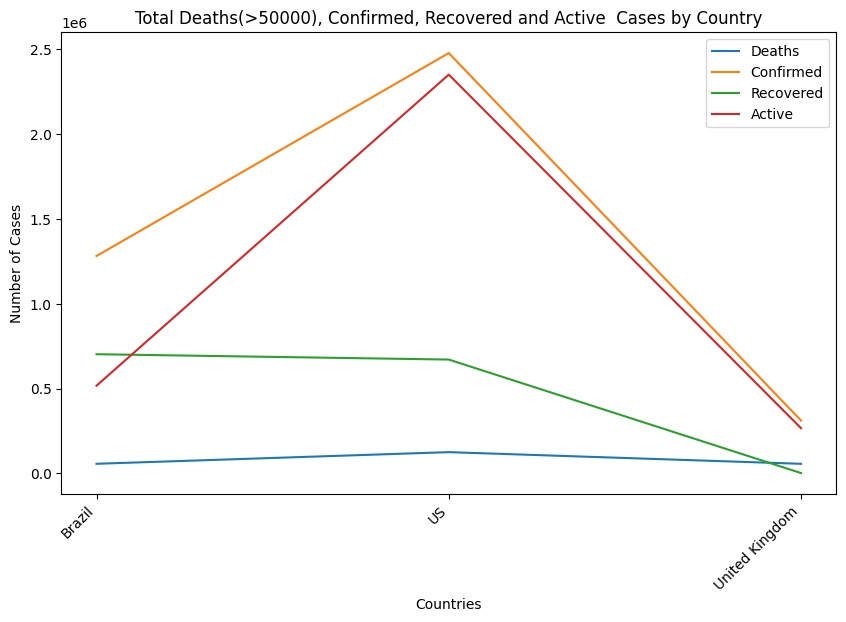

In [19]:
plt.figure(figsize = (10, 6))
plt.plot(countries_50['Country_Region'].tolist(), countries_50['Deaths'].tolist(), label = 'Deaths')
plt.plot(countries_50['Country_Region'].tolist(), countries_50['Confirmed'].tolist(), label = 'Confirmed')
plt.plot(countries_50['Country_Region'].tolist(), countries_50['Recovered'].tolist(), label = 'Recovered')
plt.plot(countries_50['Country_Region'].tolist(), countries_50['Active'].tolist(), label = 'Active')

plt.legend()
plt.title('Total Deaths(>50000), Confirmed, Recovered and Active  Cases by Country')
plt.xlabel('Countries')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Cases')
plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [20]:
import plotly.express as px

In [21]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [22]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [23]:
USA = covid_data.loc[covid_data.Country_Region == 'US']
states = USA.groupby('Province_State').sum(numeric_only = True).reset_index()
states.head()

,Province_State,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
0,Alabama,241491.0,2203.246784,-5809.578199,399150,5299,0,393851,552773.287318,113.788881
1,Alaska,154366.0,1810.439952,-4470.218368,49979,224,0,49755,132120.987029,13.889119
2,Arizona,230216.0,505.138555,-1671.948482,607345,10036,0,597309,135923.814348,29.933553
3,Arkansas,470630.0,2618.391704,-6932.548370,251746,4010,0,247736,640876.135169,143.996079
4,California,441370.0,2194.949775,-7002.258461,2776975,29638,0,2750669,335807.849823,49.931858


In [24]:
fig = px.bar(
    states,
    x = 'Province_State',
    y = 'Deaths',
    title = 'State Wise COVID-19 Deaths in the USA',
    labels = {'Deaths': 'Deaths', 'Province_State': 'State'},
    color = "Deaths",
    color_continuous_scale='reds',
    text_auto = True
)

fig.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

In [25]:
fig = px.bar(
    states,
    x = 'Province_State',
    y = 'Active',
    title = 'State Wise COVID-19 Active Cases in the USA',
    labels = {'Active': 'Active', 'Province_State': 'State'},
    color = "Active",
    color_continuous_scale = 'blues',
    text_auto = True
)

fig.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [26]:
fig = px.bar(
    states,
    x = 'Province_State',
    y = 'Active',
    title = 'State Wise COVID-19 Active Cases in the USA',
    labels = {'Active': 'Active', 'Province_State': 'State'},
    color = "Active",
    color_continuous_scale = 'greens',
    text_auto = True
)

fig.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [27]:
import plotly.express as px
import plotly.io as pio

In [28]:
last_update = covid_data.groupby('Last_Update')['Confirmed'].sum().reset_index()
last_update

,Last_Update,Confirmed
0,2020-08-04 02:27:56,152
1,2020-08-07 22:34:20,0
2,2020-12-21 13:27:30,788
3,2021-01-08 23:22:27,196
4,2021-01-10 05:22:12,90023279
5,2021-04-02 15:13:53,399


In [29]:
fig = px.line(
    last_update, 
    x = 'Last_Update',
    y = 'Confirmed',
    title = 'Worldwide Confirmed Cases of COVID-19 Over Time',
    labels = {'Last_Update' : "Date", 'Confirmed' : 'Total Cases'}
)

fig.show()